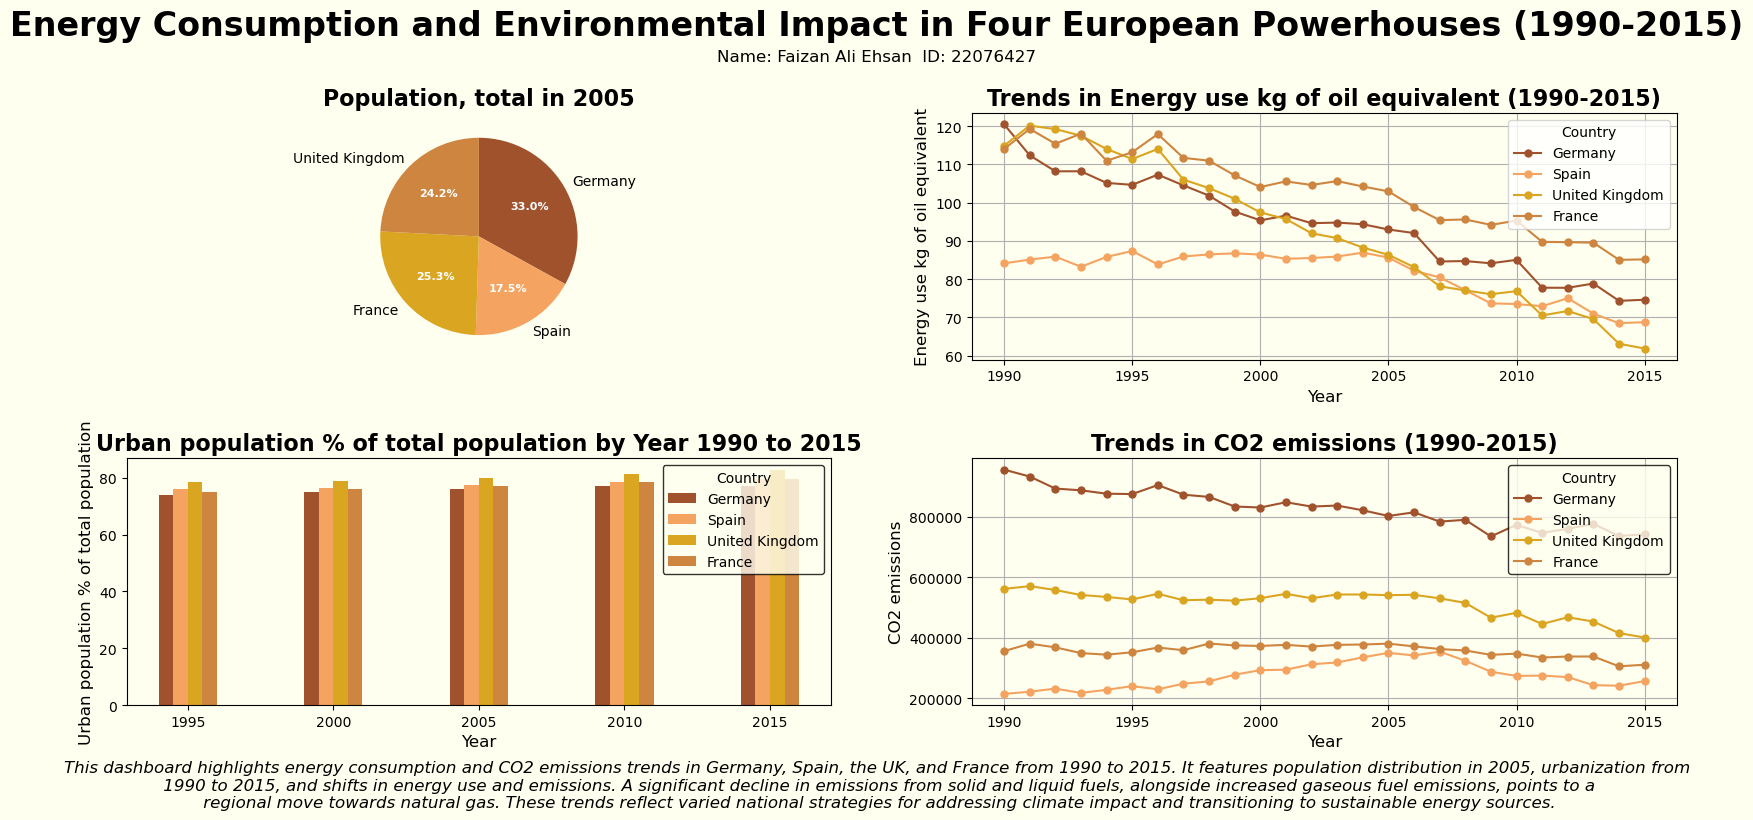

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

def process_climate_csv():
    """Processes climate data from a CSV file."""
    csv_data = pd.read_csv('World_Climate data.csv', skiprows=4)
    csv_data.drop(columns=['Indicator Code', 'Country Code'], inplace=True)
    csv_data.rename(
        columns={
            'Country Name': 'Country',
            'Indicator Name': 'Indicator'
        }, inplace=True
    )

    for col in csv_data.columns:
        if 'YR' in col:
            new_col_name = col.split('[')[0].strip()
            csv_data.rename(columns={col: new_col_name}, inplace=True)
            csv_data[new_col_name] = pd.to_numeric(
                csv_data[new_col_name], errors='coerce'
            )

    indicator_mapping = {
        'Energy use (kg of oil equivalent) per $1,000 GDP (constant 2017 PPP)': 'Energy use kg of oil equivalent',
        'Population, total': 'Population, total',
        'CO2 emissions (kt)': 'CO2 emissions',
        'Urban population (% of total population)': 'Urban population % of total population'
    }
    csv_data['Indicator'] = csv_data['Indicator'].map(indicator_mapping)
    relevant_indicators = list(indicator_mapping.values())
    csv_data = csv_data[csv_data['Indicator'].isin(relevant_indicators)]
    return csv_data

def create_energy_production_pie_chart(ax, dataset, energy_indicator, target_year='2005'):
    """Plots a pie chart highlighting energy production data for a specified year."""
    focus_countries = ['Germany', 'Spain', 'United Kingdom', 'France']
    filtered_data = dataset[dataset['Indicator'] == energy_indicator]
    filtered_data = filtered_data[filtered_data['Country'].isin(focus_countries)]
    filtered_data = filtered_data[['Country', target_year]].set_index('Country')
    
    # Ensure all data is numeric and replace NaN with 0
    filtered_data[target_year] = pd.to_numeric(filtered_data[target_year], errors='coerce').fillna(0)
    
    # Check if all values are zero, which can cause plotting issues
    if filtered_data[target_year].sum() == 0:
        print("Data contains only zero values, which cannot be plotted on a pie chart.")
        return
    
    pie_colors = ['sienna', 'sandybrown', 'goldenrod', 'peru']
    wedges, texts, autotexts = ax.pie(
        filtered_data[target_year], labels=filtered_data.index, autopct='%1.1f%%',
        colors=pie_colors, startangle=90, counterclock=False
    )
    ax.set_title(f'{energy_indicator} in {target_year}', fontsize=16, fontweight='bold')
    plt.setp(autotexts, size=8, weight='bold', color='white')

    ax.figure.canvas.draw()  # Force re-drawing to handle updates in figure

def create_vertical_energy_bar_chart(ax, dataset, energy_indicator, timeline=[1995, 2000, 2005, 2010, 2015]):
    """Plots a vertical bar chart comparing energy-related data over selected years for a specific indicator."""
    focus_countries = ['Germany', 'Spain', 'United Kingdom', 'France']
    year_columns = [str(year) for year in timeline]
    filtered_data = dataset[dataset['Indicator'] == energy_indicator]
    filtered_data = filtered_data[filtered_data['Country'].isin(focus_countries)]
    filtered_data = filtered_data[['Country'] + year_columns].set_index('Country')
    bar_width = 0.1
    chart_colors = ['sienna', 'sandybrown', 'goldenrod', 'peru']

    for i, country in enumerate(focus_countries):
        values = filtered_data.loc[country, year_columns]
        ax.bar(
            [x + i * bar_width for x in range(len(timeline))], values, label=country,
            color=chart_colors[i], width=bar_width
        )
    ax.set_xlabel('Year', fontsize=12)
    ax.set_ylabel(energy_indicator, fontsize=12)
    ax.set_title(f'{energy_indicator} by Year 1990 to 2015', fontsize=16, fontweight='bold')
    ax.legend(title='Country')
    ax.set_xticks([x + (len(focus_countries) - 1) * bar_width / 2 for x in range(len(timeline))])
    ax.set_xticklabels(timeline)

def create_energy_trend_line_chart(ax, dataset, energy_indicator):
    """Plots a line chart showing trends in energy production over time for selected countries."""
    target_countries = ['Germany', 'Spain', 'United Kingdom', 'France']
    year_range = [str(year) for year in range(1990, 2016)]
    energy_data = dataset[dataset['Indicator'] == energy_indicator]
    trend_colors = ['sienna', 'sandybrown', 'goldenrod', 'peru']

    for i, country in enumerate(target_countries):
        country_energy_data = energy_data[energy_data['Country'] == country]
        if not country_energy_data.empty:
            annual_data = country_energy_data.iloc[0][year_range].fillna(0)
            ax.plot(
                year_range, annual_data, label=country, marker='o',
                linestyle='-', markersize=5, color=trend_colors[i]
            )
    ax.set_xlabel('Year', fontsize=12)
    ax.set_ylabel(energy_indicator, fontsize=12)
    ax.set_title(f'Trends in {energy_indicator} (1990-2015)', fontsize=16, fontweight='bold')
    ax.legend(title='Country')
    ax.set_xticks(year_range[::5])  # Setting x-ticks every 5 years for clarity
    ax.grid(True)

# Main script to create plots
df = process_climate_csv()
fig = plt.figure(figsize=(20, 8), facecolor='Ivory')
gs = gridspec.GridSpec(2, 2, width_ratios=[4, 4], height_ratios=[1, 1])
plt.subplots_adjust(top=0.85)
fig.suptitle('Energy Consumption and Environmental Impact in Four European Powerhouses (1990-2015)', fontsize=24, fontweight='bold')
fig.text(0.5, 0.92, "Name: Faizan Ali Ehsan  ID: 22076427", ha='center', va='center', fontsize=12)
ax1 = plt.subplot(gs[0])
ax1.set_facecolor('Ivory')
create_energy_production_pie_chart(ax1, df, 'Population, total')
# Customizing legend for Line Plot
legend = ax2.legend(title='Country', facecolor='Ivory', edgecolor='black')
ax2 = plt.subplot(gs[1])
ax2.set_facecolor('Ivory')
create_energy_trend_line_chart(ax2, df, 'Energy use kg of oil equivalent')

ax3 = plt.subplot(gs[2])
ax3.set_facecolor('Ivory')
create_vertical_energy_bar_chart(ax3, df, 'Urban population % of total population')
# Customizing legend for Bar Chart
legend = ax3.legend(title='Country', facecolor='Ivory', edgecolor='black')
ax4 = plt.subplot(gs[3])
ax4.set_facecolor('Ivory')
# Customizing legend for Line Plot

create_energy_trend_line_chart(ax4, df, 'CO2 emissions')
legend = ax4.legend(title='Country', facecolor='Ivory', edgecolor='black')
plt.subplots_adjust(wspace=0.2, hspace=0.4)
summary_text = (
    "This dashboard highlights energy consumption and CO2 emissions trends in Germany, Spain, the UK, and France from "
    "1990 to 2015. It features population distribution in 2005, urbanization from\n 1990 to 2015, and shifts in energy use "
    "and emissions. A significant decline in emissions from solid and liquid fuels, alongside increased gaseous fuel "
    "emissions, points to a\n regional move towards natural gas. These trends reflect varied national strategies for "
    "addressing climate impact and transitioning to sustainable energy sources."
)
fig.text(0.5, 0.01, summary_text, ha='center', va='center', fontsize=12, style='italic')
plt.savefig('22076427.png', dpi=300, bbox_inches='tight')
